In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline

**Data Wrangling**


In this step,we understand the data,clean the data and convert it to a format that makes sense to analyse.For this


*   We check duplicate rows
*   We check null values
*   We drop non essential columns

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9921 entries, 0 to 9920
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9921 non-null   int64  
 1   imdb_id               9911 non-null   object 
 2   popularity            9921 non-null   float64
 3   budget                9921 non-null   int64  
 4   revenue               9921 non-null   int64  
 5   original_title        9921 non-null   object 
 6   cast                  9848 non-null   object 
 7   homepage              2898 non-null   object 
 8   director              9878 non-null   object 
 9   tagline               7248 non-null   object 
 10  keywords              8467 non-null   object 
 11  overview              9916 non-null   object 
 12  runtime               9920 non-null   float64
 13  genres                9898 non-null   object 
 14  production_companies  8926 non-null   object 
 15  release_date         

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9921.000000,9921.000000,9.921000e+03,9.921000e+03,9920.000000,9920.000000,9920.000000,9920.000000,9.920000e+03,9.920000e+03
mean,70752.041931,0.662899,1.553647e+07,4.141644e+07,101.578528,228.315020,5.955796,2003.470262,1.805011e+07,5.029401e+07
std,94980.056076,1.035543,3.203258e+07,1.206734e+08,31.868316,596.320857,0.941592,10.709582,3.504047e+07,1.414900e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1962.000000,0.000000e+00,0.000000e+00
25%,10822.000000,0.209028,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1998.000000,0.000000e+00,0.000000e+00
50%,22476.000000,0.387797,0.000000e+00,0.000000e+00,98.000000,40.000000,6.000000,2007.000000,0.000000e+00,0.000000e+00
75%,84288.000000,0.730181,1.700000e+07,2.510526e+07,111.000000,156.000000,6.600000,2012.000000,2.112241e+07,3.341720e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.duplicated().sum()

1

In [5]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      73
homepage                7023
director                  43
tagline                 2673
keywords                1454
overview                   5
runtime                    1
genres                    23
production_companies     995
release_date               1
vote_count                 1
vote_average               1
release_year               1
budget_adj                 1
revenue_adj                1
dtype: int64

**Some Observations for data description.**

*   Total rows are 10866
*   Total columns are 21



In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
type(df.release_date[0])

str

In [8]:
df.drop(columns = ['imdb_id','homepage','tagline','overview','keywords'],inplace=True,axis = 1)

In [9]:
##Convert releasedate from string format to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
type(df.release_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9920 entries, 0 to 9920
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9920 non-null   int64         
 1   popularity            9920 non-null   float64       
 2   budget                9920 non-null   int64         
 3   revenue               9920 non-null   int64         
 4   original_title        9920 non-null   object        
 5   cast                  9847 non-null   object        
 6   director              9877 non-null   object        
 7   runtime               9919 non-null   float64       
 8   genres                9897 non-null   object        
 9   production_companies  8925 non-null   object        
 10  release_date          9919 non-null   datetime64[ns]
 11  vote_count            9919 non-null   float64       
 12  vote_average          9919 non-null   float64       
 13  release_year      

In [11]:
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Thriller|Action|War', 'Western|Action', 'Music|Comedy|Crime'],
      dtype=object)

In [12]:
df.isna().sum()

id                        0
popularity                0
budget                    0
revenue                   0
original_title            0
cast                     73
director                 43
runtime                   1
genres                   23
production_companies    995
release_date              1
vote_count                1
vote_average              1
release_year              1
budget_adj                1
revenue_adj               1
dtype: int64

In [13]:
#missing value handling
df['production_companies']=df['production_companies'].fillna('Unknown')

In [14]:
df=df.dropna(how='any')

In [15]:
df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [16]:
df.shape

(9791, 16)

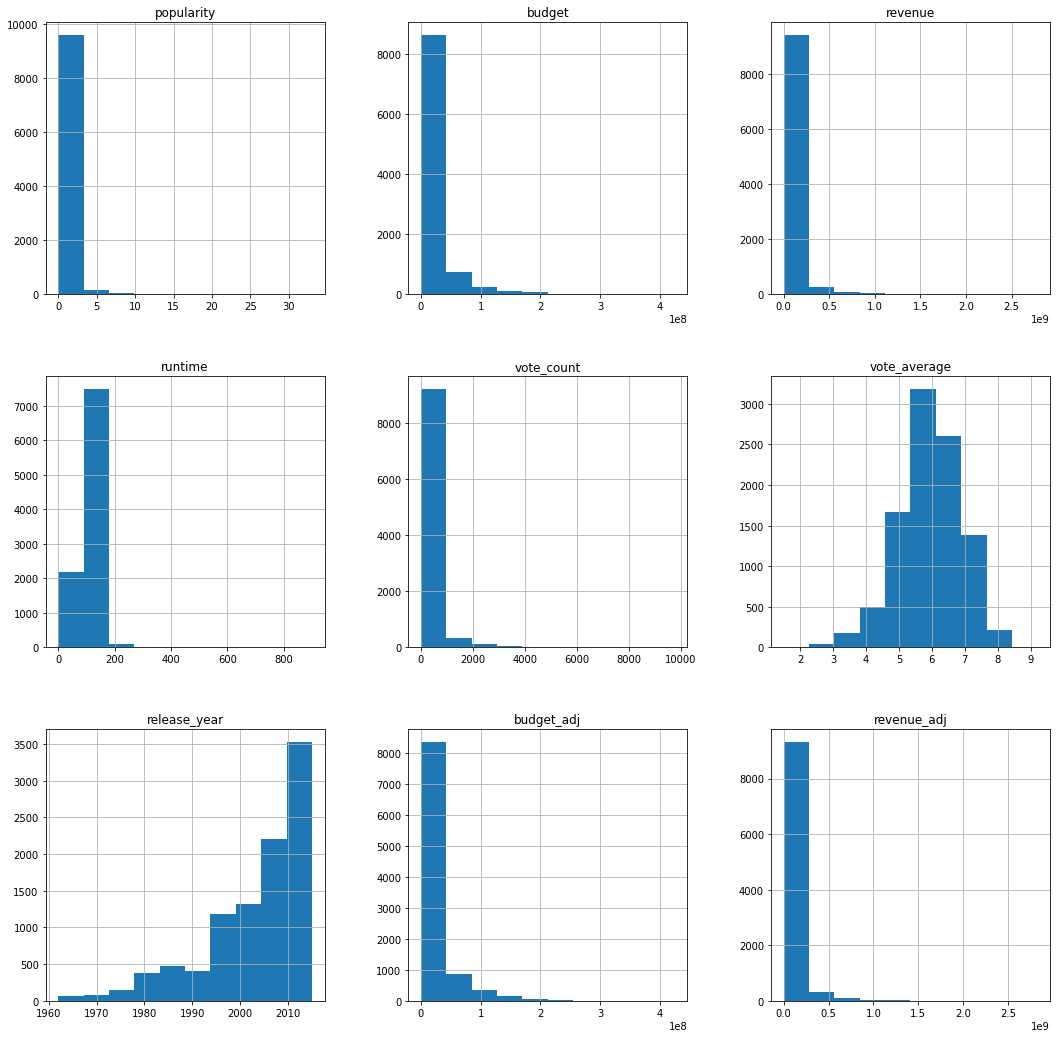

In [17]:
# Lets get a quick Histogram plot up and running.
# We want to ignore the id column since it's not a relevant for plotting

df.drop(['id'], axis=1).hist(figsize=( 18,18));

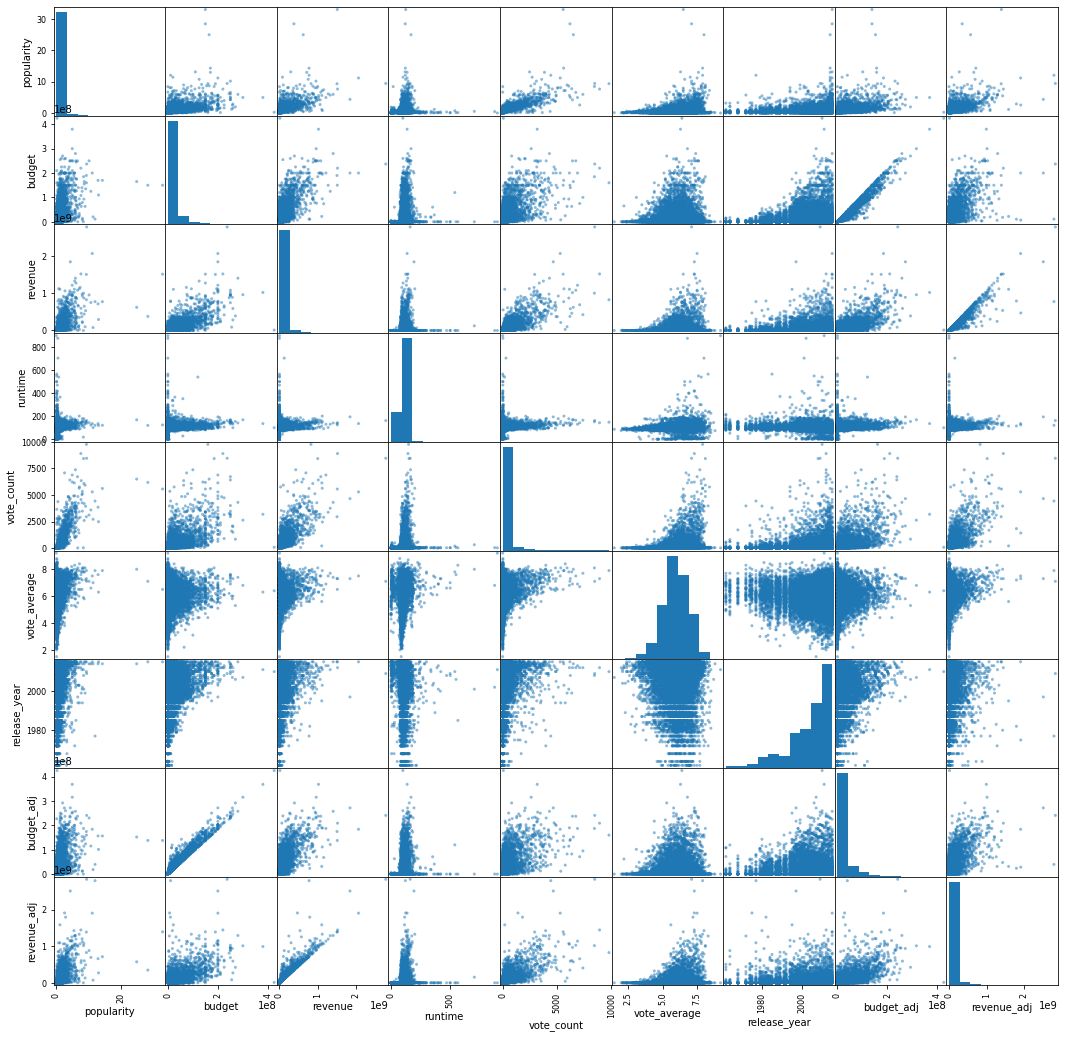

In [18]:
pd.plotting.scatter_matrix(df.drop(['id'], axis=1), figsize=(18,18));

In [19]:
df_corr = df.drop(['id'], axis=1).corr()

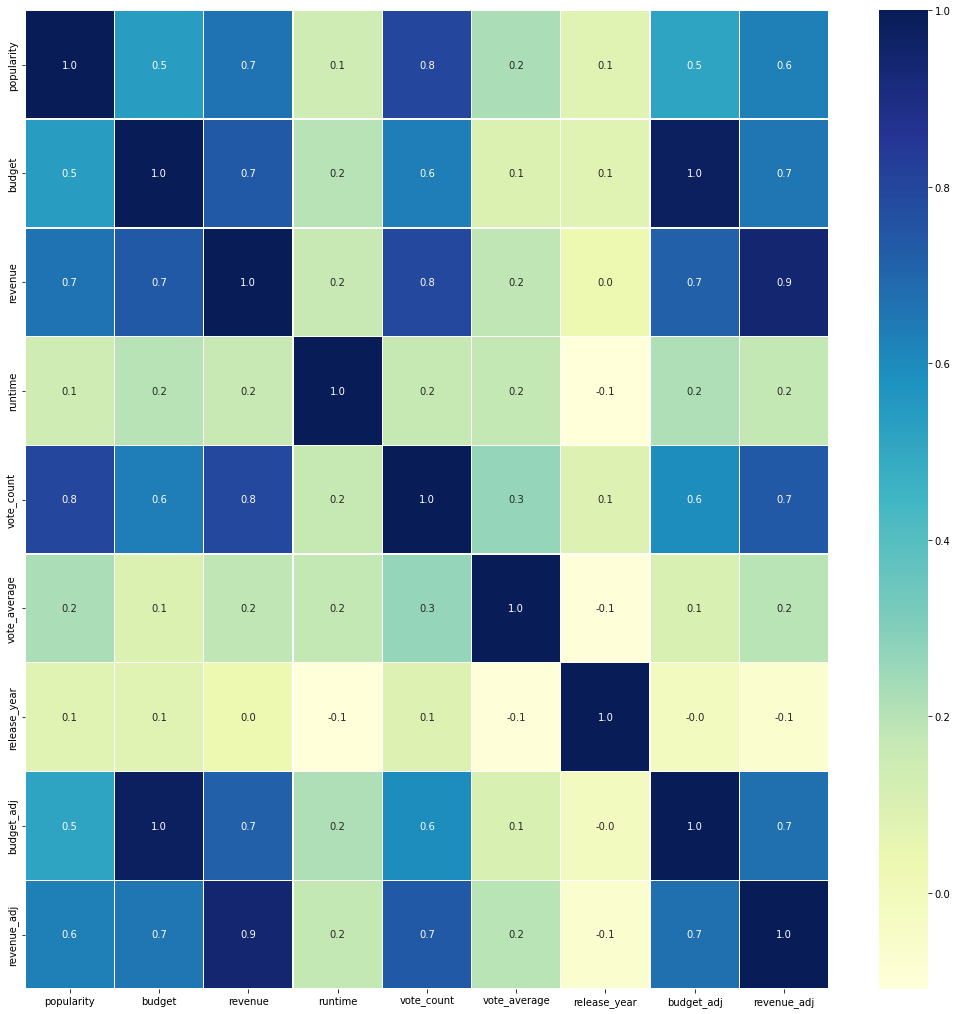

In [20]:
f, ax= plt.subplots(figsize=(18,18))
sns.heatmap(df_corr, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f', ax=ax)
plt.show()

Looks like the distributions are showing a lot of 0 values for revenue and budget and their respective adjusted

**Verify Data Quality**

**Missing Data**

In [21]:
# Function that will take an input table with aggregated values to columns, and then create an output table with 
# two columns - the values and the percentage of total values in that column
def values_table(data):
        val = data
        val_percent = 100 * val / len(data)
        val_table = pd.concat([val, val_percent], axis=1)
        val_table_ren_columns = val_table.rename(
        columns = {0 : 'Values', 1 : '% of Total Values'})
        val_table_ren_columns = val_table_ren_columns[
            val_table_ren_columns.iloc[:,0] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        #print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
         #   "There are " + str(val_table_ren_columns.shape[0]) +
          #    " columns that have the values you filtered for.")
        return val_table_ren_columns

In [22]:
values_table(df.isnull().sum() )

,Values,% of Total Values


In [23]:
values_table((df == 0).sum() )

,Values,% of Total Values
revenue,5346,33412.5
revenue_adj,5346,33412.5
budget,5031,31443.8
budget_adj,5031,31443.8
runtime,28,175.0


In this case, we do not want missing values for budget, budget_adj, revenu and revenue_adj affecting the research for our analysis, so we will make these values NULL instead

In [24]:
df1=df

Text(0.5, 1.0, 'All numeric box plots')

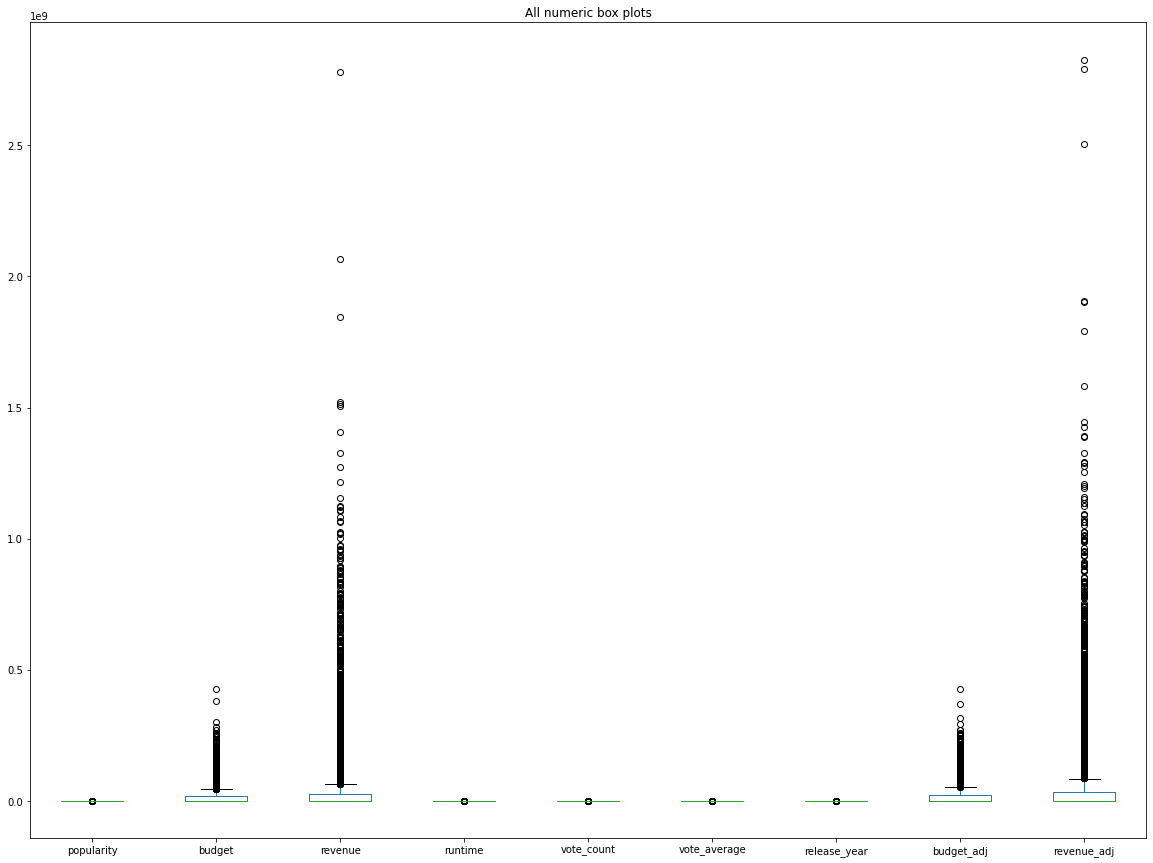

In [25]:
#outlier detection & Handling
df1.drop(columns='id',axis=1).plot(kind='box',figsize=(20,15));
plt.title('All numeric box plots')

In [26]:
def find_outliers(series):
    Q1 = np.percentile(series, 25, interpolation = 'midpoint')
    Q2 = np.percentile(series, 50, interpolation = 'midpoint')
    Q3 = np.percentile(series, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5*IQR
    up_lim = Q3 + 1.5*IQR
    print(f'Upper limit = {up_lim} and Lower limit = {low_lim}')
    outlier_list = []
    for x in series:
        if((x>up_lim) or (x<low_lim)):
            outlier_list.append(x)
            print(f'Outliers for {series.name} = {outlier_list}')
            return outlier_list

In [27]:
revenue_outliers = find_outliers(df1['revenue'])
revenue_outliers

Upper limit = 64869095.0 and Lower limit = -38921457.0
Outliers for revenue = [1513528810]


[1513528810]

In [28]:
budget_outliers = find_outliers(df1['budget'])
budget_outliers

Upper limit = 45000000.0 and Lower limit = -27000000.0
Outliers for budget = [150000000]


[150000000]

In [29]:
budget_adj_outliers = find_outliers(df1['budget_adj'])
budget_adj_outliers

Upper limit = 54496674.58185125 and Lower limit = -32698004.74911075
Outliers for budget_adj = [137999939.280026]


[137999939.280026]

In [30]:

revenue_adj_outliers = find_outliers(df1['revenue_adj'])
revenue_adj_outliers

Upper limit = 85276072.2276625 and Lower limit = -51165643.3365975
Outliers for revenue_adj = [1392445892.5238]


[1392445892.5238]

In [31]:
rev_h=df1['revenue']>64869095.0
t_h=df1.loc[rev_h].index
t_h

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9767, 9785, 9790, 9805, 9806, 9808, 9850, 9881, 9883, 9887],
           dtype='int64', length=1563)

In [32]:
rev_l=df1['revenue']<-38921457.0
r_l=df1.loc[rev_l].index
r_l

Int64Index([], dtype='int64')

In [33]:
df1.drop(t_h,inplace=True)

In [34]:
bdj_h=df1['budget']>45000000.0
b_h=df1.loc[bdj_h].index
b_h

Int64Index([  57,   59,   89,  165,  699,  710,  780,  896, 1436, 1438,
            ...
            9053, 9059, 9060, 9065, 9079, 9085, 9092, 9191, 9328, 9415],
           dtype='int64', length=253)

In [35]:
bdj_l=df1['budget']<-27000000.0
b_l=df1.loc[bdj_l].index
b_l

Int64Index([], dtype='int64')

In [36]:
df1.drop(b_h,inplace=True)

In [37]:
baj_h=df1['budget_adj']>54496674.58185125
ba_h=df1.loc[baj_h].index
ba_h

Int64Index([1335, 1364, 2504, 2740, 4202, 4219, 4241, 4261, 4289, 4305, 4318,
            7318, 7332, 7842, 7851, 7886, 7888, 7893, 7894, 7904, 7940, 7954,
            8002, 8118, 8134, 8148, 8184, 8215, 8258, 8293, 8310, 8315, 8397,
            8426, 8501, 8518, 8520, 8531, 8552, 8574, 8593, 8605, 8622, 8888,
            8956, 9088, 9287, 9329, 9331, 9333, 9347, 9400, 9407, 9466, 9512,
            9636, 9719, 9729, 9738, 9758, 9836, 9856, 9868],
           dtype='int64')

In [38]:
baj_l=df1['budget_adj']<-32698004.74911075
ba_l=df1.loc[baj_l].index
ba_l

Int64Index([], dtype='int64')

In [39]:
df1.drop(ba_h,inplace=True)

In [40]:
raj_h=df1['revenue_adj']>85276072.2276625
ra_h=df1.loc[raj_h].index
ra_h

Int64Index([1332, 1341, 1344, 1347, 1351, 1352, 1366, 1372, 5274, 6082, 6087,
            6095, 6103, 6104, 6117, 6137, 6160, 7270, 7278, 7288, 7310, 7313,
            7316, 7320, 7326, 7365, 7835, 7839, 7840, 7843, 7849, 7852, 7860,
            7861, 7869, 7889, 7909, 7934, 7995, 8001, 8016, 8056, 8179, 8302,
            8304, 8313, 8384, 8387, 8399, 8400, 8421, 8425, 8429, 8901, 8933,
            9200, 9207, 9228, 9341, 9343, 9464, 9470, 9472, 9545, 9568, 9569,
            9595, 9599, 9603, 9605, 9616, 9621, 9626, 9642, 9659, 9669, 9673,
            9720, 9724, 9727, 9731, 9735, 9759, 9762, 9766, 9769, 9772, 9776,
            9781, 9791, 9810, 9813, 9824, 9830, 9835, 9849, 9852, 9888],
           dtype='int64')

In [41]:
raj_l=df1['revenue_adj']<-51165643.3365975
ra_l=df1.loc[raj_l].index
ra_l

Int64Index([], dtype='int64')

In [42]:
df1.drop(ra_h,inplace=True)

In [43]:
df1.shape

(7814, 16)

Text(0.5, 1.0, 'All numeric box plots')

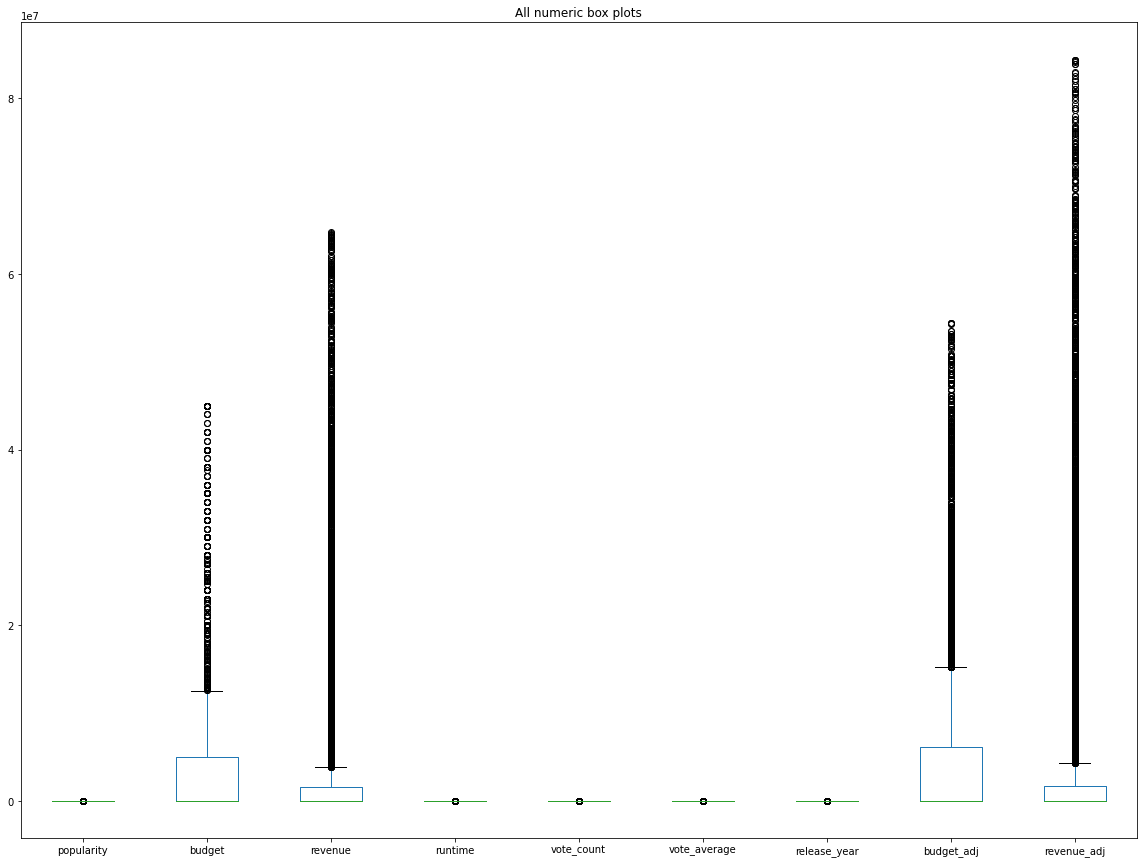

In [44]:
df1.drop(columns='id',axis=1).plot(kind='box',figsize=(20,15));
plt.title('All numeric box plots')

In [45]:
df1=df1.drop(columns='id',axis='1')

In [46]:
df1

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
12,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108.0,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854.0,7.6,2015.0,1.379999e+07,3.391985e+07
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103.0,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425.0,6.4,2015.0,0.000000e+00,2.700677e+07
35,3.557846,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117.0,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520.0,8.0,2015.0,5.519998e+06,3.256960e+07
36,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101.0,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474.0,6.2,2015.0,0.000000e+00,2.056620e+07
39,3.227329,11000000,62076141,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,John Crowley,111.0,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,2015-11-04,754.0,7.3,2015.0,1.012000e+07,5.711002e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,0.127679,0,0,Cheyenne Autumn,Richard Widmark|Carroll Baker|Karl Malden|Sal ...,John Ford,154.0,Western|Action,Warner Bros.|Ford-Smith Productions,2064-10-03,14.0,5.5,1964.0,0.000000e+00,0.000000e+00
9916,0.082856,0,0,First Men in the Moon,Edward Judd|Martha Hyer|Lionel Jeffries|Miles ...,Nathan H. Juran,103.0,Adventure|Science Fiction,Ameran Films,2064-07-01,12.0,5.7,1964.0,0.000000e+00,0.000000e+00
9917,0.068176,0,0,Robin and the 7 Hoods,"Frank Sinatra|Dean Martin|Sammy Davis, Jr.|Bin...",Gordon Douglas,123.0,Music|Comedy|Crime,Warner Bros.,2064-06-24,12.0,5.2,1964.0,0.000000e+00,0.000000e+00
9918,0.067621,0,0,The Americanization of Emily,James Garner|Julie Andrews|Melvyn Douglas|Jame...,Arthur Hiller,115.0,Comedy|Romance,Filmways Pictures|Metro-Goldwyn-Mayer (MGM),2064-10-27,11.0,4.6,1964.0,0.000000e+00,0.000000e+00


In [47]:
df1.reset_index(drop=True)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108.0,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854.0,7.6,2015.0,1.379999e+07,3.391985e+07
1,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103.0,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425.0,6.4,2015.0,0.000000e+00,2.700677e+07
2,3.557846,6000000,35401758,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117.0,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520.0,8.0,2015.0,5.519998e+06,3.256960e+07
3,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101.0,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474.0,6.2,2015.0,0.000000e+00,2.056620e+07
4,3.227329,11000000,62076141,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,John Crowley,111.0,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,2015-11-04,754.0,7.3,2015.0,1.012000e+07,5.711002e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,0.127679,0,0,Cheyenne Autumn,Richard Widmark|Carroll Baker|Karl Malden|Sal ...,John Ford,154.0,Western|Action,Warner Bros.|Ford-Smith Productions,2064-10-03,14.0,5.5,1964.0,0.000000e+00,0.000000e+00
7810,0.082856,0,0,First Men in the Moon,Edward Judd|Martha Hyer|Lionel Jeffries|Miles ...,Nathan H. Juran,103.0,Adventure|Science Fiction,Ameran Films,2064-07-01,12.0,5.7,1964.0,0.000000e+00,0.000000e+00
7811,0.068176,0,0,Robin and the 7 Hoods,"Frank Sinatra|Dean Martin|Sammy Davis, Jr.|Bin...",Gordon Douglas,123.0,Music|Comedy|Crime,Warner Bros.,2064-06-24,12.0,5.2,1964.0,0.000000e+00,0.000000e+00
7812,0.067621,0,0,The Americanization of Emily,James Garner|Julie Andrews|Melvyn Douglas|Jame...,Arthur Hiller,115.0,Comedy|Romance,Filmways Pictures|Metro-Goldwyn-Mayer (MGM),2064-10-27,11.0,4.6,1964.0,0.000000e+00,0.000000e+00


In [48]:
df1['budget'] = df1['budget'].replace(0, np.NaN)
df1['revenue'] = df1['revenue'].replace(0, np.NaN)
df1['budget_adj'] = df1['budget_adj'].replace(0, np.NaN)
df1['revenue_adj'] = df1['revenue_adj'].replace(0, np.NaN)

In [49]:
df1

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
12,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108.0,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854.0,7.6,2015.0,1.379999e+07,3.391985e+07
30,3.927333,NaN,29355203.0,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103.0,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425.0,6.4,2015.0,NaN,2.700677e+07
35,3.557846,6000000.0,35401758.0,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117.0,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520.0,8.0,2015.0,5.519998e+06,3.256960e+07
36,3.358321,NaN,22354572.0,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101.0,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474.0,6.2,2015.0,NaN,2.056620e+07
39,3.227329,11000000.0,62076141.0,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,John Crowley,111.0,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,2015-11-04,754.0,7.3,2015.0,1.012000e+07,5.711002e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,0.127679,NaN,NaN,Cheyenne Autumn,Richard Widmark|Carroll Baker|Karl Malden|Sal ...,John Ford,154.0,Western|Action,Warner Bros.|Ford-Smith Productions,2064-10-03,14.0,5.5,1964.0,NaN,NaN
9916,0.082856,NaN,NaN,First Men in the Moon,Edward Judd|Martha Hyer|Lionel Jeffries|Miles ...,Nathan H. Juran,103.0,Adventure|Science Fiction,Ameran Films,2064-07-01,12.0,5.7,1964.0,NaN,NaN
9917,0.068176,NaN,NaN,Robin and the 7 Hoods,"Frank Sinatra|Dean Martin|Sammy Davis, Jr.|Bin...",Gordon Douglas,123.0,Music|Comedy|Crime,Warner Bros.,2064-06-24,12.0,5.2,1964.0,NaN,NaN
9918,0.067621,NaN,NaN,The Americanization of Emily,James Garner|Julie Andrews|Melvyn Douglas|Jame...,Arthur Hiller,115.0,Comedy|Romance,Filmways Pictures|Metro-Goldwyn-Mayer (MGM),2064-10-27,11.0,4.6,1964.0,NaN,NaN


In [50]:
# Confirm values changed
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 12 to 9919
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            7814 non-null   float64       
 1   budget                2876 non-null   float64       
 2   revenue               2546 non-null   float64       
 3   original_title        7814 non-null   object        
 4   cast                  7814 non-null   object        
 5   director              7814 non-null   object        
 6   runtime               7814 non-null   float64       
 7   genres                7814 non-null   object        
 8   production_companies  7814 non-null   object        
 9   release_date          7814 non-null   datetime64[ns]
 10  vote_count            7814 non-null   float64       
 11  vote_average          7814 non-null   float64       
 12  release_year          7814 non-null   float64       
 13  budget_adj       

In [51]:
df1.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7814.000000,2.876000e+03,2.546000e+03,7814.000000,7814.000000,7814.000000,7814.000000,2.876000e+03,2.546000e+03
mean,0.423263,1.264611e+07,1.632623e+07,98.976453,78.586127,5.874968,2003.773228,1.520559e+07,2.098048e+07
std,0.424551,1.092840e+07,1.673706e+07,31.211851,173.708546,0.960473,10.809570,1.322239e+07,2.137684e+07
min,0.000620,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1962.000000,9.210911e-01,2.370705e+00
25%,0.181734,3.500000e+06,1.871547e+06,89.000000,15.000000,5.300000,1999.000000,4.399366e+06,2.179201e+06
50%,0.319825,1.000000e+07,1.090214e+07,96.000000,28.000000,5.900000,2007.000000,1.152947e+07,1.392288e+07
75%,0.524745,2.000000e+07,2.644917e+07,107.000000,70.000000,6.500000,2012.000000,2.332861e+07,3.422989e+07
max,8.411577,4.500000e+07,6.482280e+07,900.000000,5754.000000,9.200000,2015.000000,5.445056e+07,8.440928e+07


**Encoding**

reseting index number

In [52]:
df1.reset_index(drop=True)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108.0,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854.0,7.6,2015.0,1.379999e+07,3.391985e+07
1,3.927333,NaN,29355203.0,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103.0,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425.0,6.4,2015.0,NaN,2.700677e+07
2,3.557846,6000000.0,35401758.0,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117.0,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520.0,8.0,2015.0,5.519998e+06,3.256960e+07
3,3.358321,NaN,22354572.0,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101.0,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474.0,6.2,2015.0,NaN,2.056620e+07
4,3.227329,11000000.0,62076141.0,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,John Crowley,111.0,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,2015-11-04,754.0,7.3,2015.0,1.012000e+07,5.711002e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,0.127679,NaN,NaN,Cheyenne Autumn,Richard Widmark|Carroll Baker|Karl Malden|Sal ...,John Ford,154.0,Western|Action,Warner Bros.|Ford-Smith Productions,2064-10-03,14.0,5.5,1964.0,NaN,NaN
7810,0.082856,NaN,NaN,First Men in the Moon,Edward Judd|Martha Hyer|Lionel Jeffries|Miles ...,Nathan H. Juran,103.0,Adventure|Science Fiction,Ameran Films,2064-07-01,12.0,5.7,1964.0,NaN,NaN
7811,0.068176,NaN,NaN,Robin and the 7 Hoods,"Frank Sinatra|Dean Martin|Sammy Davis, Jr.|Bin...",Gordon Douglas,123.0,Music|Comedy|Crime,Warner Bros.,2064-06-24,12.0,5.2,1964.0,NaN,NaN
7812,0.067621,NaN,NaN,The Americanization of Emily,James Garner|Julie Andrews|Melvyn Douglas|Jame...,Arthur Hiller,115.0,Comedy|Romance,Filmways Pictures|Metro-Goldwyn-Mayer (MGM),2064-10-27,11.0,4.6,1964.0,NaN,NaN


In [53]:
d_frame=df1
d_frame['col_genres']=d_frame['genres'].apply(lambda x:str(x).split('|'))
d_frame.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,col_genres
12,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108.0,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854.0,7.6,2015.0,1.379999e+07,3.391985e+07,"[Drama, Science Fiction]"
30,3.927333,NaN,29355203.0,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103.0,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425.0,6.4,2015.0,NaN,2.700677e+07,"[Mystery, Drama]"
35,3.557846,6000000.0,35401758.0,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117.0,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520.0,8.0,2015.0,5.519998e+06,3.256960e+07,"[Drama, Thriller]"
36,3.358321,NaN,22354572.0,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101.0,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474.0,6.2,2015.0,NaN,2.056620e+07,"[Crime, Drama, Mystery]"
39,3.227329,11000000.0,62076141.0,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,John Crowley,111.0,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,2015-11-04,754.0,7.3,2015.0,1.012000e+07,5.711002e+07,"[Drama, Romance]"


In [54]:
genres=[]
for i in d_frame['col_genres']:
    genres.extend(i)
    
genres=set(genres)
genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [55]:
movie_genres=dict(zip(d_frame['original_title'],d_frame['col_genres']))
movie_genres

{'Ex Machina': ['Drama', 'Science Fiction'],
 'Mr. Holmes': ['Mystery', 'Drama'],
 'Room': ['Drama', 'Thriller'],
 'Solace': ['Crime', 'Drama', 'Mystery'],
 'Brooklyn': ['Drama', 'Romance'],
 'Steve Jobs': ['History', 'Drama'],
 'The Age of Adaline': ['Fantasy', 'Drama', 'Romance'],
 'Hardcore Henry': ['Action', 'Adventure', 'Science Fiction'],
 'Wild Card': ['Thriller', 'Crime', 'Drama'],
 'The Lobster': ['Thriller', 'Comedy', 'Drama', 'Romance', 'Science Fiction'],
 'Carol': ['Romance', 'Drama'],
 'Burnt': ['Drama'],
 'Self/less': ['Science Fiction', 'Mystery', 'Thriller'],
 'The Danish Girl': ['Drama'],
 'The Witch': ['Mystery', 'Horror'],
 'Survivor': ['Science Fiction', 'Action', 'Fantasy'],
 'Eye in the Sky': ['Drama', 'Thriller', 'War'],
 'Legend': ['Action', 'Adventure', 'Fantasy', 'Romance'],
 'Beyond the Reach': ['Thriller'],
 'Mythica: The Darkspore': ['Action', 'Adventure', 'Fantasy'],
 'Me and Earl and the Dying Girl': ['Comedy', 'Drama'],
 'Concussion': ['Drama'],
 'The N

In [56]:
dict(d_frame['original_title'])

{12: 'Ex Machina',
 30: 'Mr. Holmes',
 35: 'Room',
 36: 'Solace',
 39: 'Brooklyn',
 42: 'Steve Jobs',
 44: 'The Age of Adaline',
 45: 'Hardcore Henry',
 48: 'Wild Card',
 49: 'The Lobster',
 50: 'Carol',
 55: 'Burnt',
 56: 'Self/less',
 58: 'The Danish Girl',
 62: 'The Witch',
 67: 'Survivor',
 70: 'Eye in the Sky',
 71: 'Legend',
 72: 'Beyond the Reach',
 74: 'Mythica: The Darkspore',
 75: 'Me and Earl and the Dying Girl',
 77: 'Concussion',
 78: 'The Night Before',
 79: 'Knock Knock',
 80: 'The Longest Ride',
 82: 'Love the Coopers',
 83: 'The Walk',
 84: 'Tracers',
 87: 'Maggie',
 88: 'Equals',
 90: 'The Gift',
 92: 'Mythica: The Necromancer',
 93: 'Vice',
 96: 'The Dressmaker',
 97: 'The DUFF',
 98: 'Sinister 2',
 100: 'Frozen Fever',
 101: 'High-Rise',
 102: 'The Boy Next Door',
 103: 'Spooks: The Greater Good',
 104: 'Entourage',
 106: 'Scouts Guide to the Zombie Apocalypse',
 109: 'Heist',
 110: 'Krampus',
 111: 'Dark Places',
 112: 'No Escape',
 113: 'Dope',
 114: 'American Ult

In [57]:
df3=d_frame
df3=df3.drop(columns=['genres','col_genres'],axis=1)
df3

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
12,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108.0,DNA Films|Universal Pictures International (UP...,2015-01-21,2854.0,7.6,2015.0,1.379999e+07,3.391985e+07
30,3.927333,NaN,29355203.0,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103.0,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425.0,6.4,2015.0,NaN,2.700677e+07
35,3.557846,6000000.0,35401758.0,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117.0,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520.0,8.0,2015.0,5.519998e+06,3.256960e+07
36,3.358321,NaN,22354572.0,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101.0,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474.0,6.2,2015.0,NaN,2.056620e+07
39,3.227329,11000000.0,62076141.0,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,John Crowley,111.0,Wildgaze Films|Irish Film Board|Item 7|Paralle...,2015-11-04,754.0,7.3,2015.0,1.012000e+07,5.711002e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,0.127679,NaN,NaN,Cheyenne Autumn,Richard Widmark|Carroll Baker|Karl Malden|Sal ...,John Ford,154.0,Warner Bros.|Ford-Smith Productions,2064-10-03,14.0,5.5,1964.0,NaN,NaN
9916,0.082856,NaN,NaN,First Men in the Moon,Edward Judd|Martha Hyer|Lionel Jeffries|Miles ...,Nathan H. Juran,103.0,Ameran Films,2064-07-01,12.0,5.7,1964.0,NaN,NaN
9917,0.068176,NaN,NaN,Robin and the 7 Hoods,"Frank Sinatra|Dean Martin|Sammy Davis, Jr.|Bin...",Gordon Douglas,123.0,Warner Bros.,2064-06-24,12.0,5.2,1964.0,NaN,NaN
9918,0.067621,NaN,NaN,The Americanization of Emily,James Garner|Julie Andrews|Melvyn Douglas|Jame...,Arthur Hiller,115.0,Filmways Pictures|Metro-Goldwyn-Mayer (MGM),2064-10-27,11.0,4.6,1964.0,NaN,NaN


#**Genre category with a one-hot encoding ( 1 and 0)**

In [58]:
for index,	title in dict(df3['original_title']).items():
    for genres in movie_genres[title]:
        df3.at[index,genres]=1
df3=df3.fillna(0)
df3

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Drama,Science Fiction,Mystery,Thriller,Crime,Romance,History,Fantasy,Action,Adventure,Comedy,Horror,War,Family,Animation,Western,Music,Documentary,TV Movie,Foreign
12,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108.0,DNA Films|Universal Pictures International (UP...,2015-01-21,2854.0,7.6,2015.0,1.379999e+07,3.391985e+07,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,3.927333,0.0,29355203.0,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103.0,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425.0,6.4,2015.0,0.000000e+00,2.700677e+07,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,3.557846,6000000.0,35401758.0,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117.0,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520.0,8.0,2015.0,5.519998e+06,3.256960e+07,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,3.358321,0.0,22354572.0,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101.0,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474.0,6.2,2015.0,0.000000e+00,2.056620e+07,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,3.227329,11000000.0,62076141.0,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,John Crowley,111.0,Wildgaze Films|Irish Film Board|Item 7|Paralle...,2015-11-04,754.0,7.3,2015.0,1.012000e+07,5.711002e+07,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,0.127679,0.0,0.0,Cheyenne Autumn,Richard Widmark|Carroll Baker|Karl Malden|Sal ...,John Ford,154.0,Warner Bros.|Ford-Smith Productions,2064-10-03,14.0,5.5,1964.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9916,0.082856,0.0,0.0,First Men in the Moon,Edward Judd|Martha Hyer|Lionel Jeffries|Miles ...,Nathan H. Juran,103.0,Ameran Films,2064-07-01,12.0,5.7,1964.0,0.000000e+00,0.000000e+00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9917,0.068176,0.0,0.0,Robin and the 7 Hoods,"Frank Sinatra|Dean Martin|Sammy Davis, Jr.|Bin...",Gordon Douglas,123.0,Warner Bros.,2064-06-24,12.0,5.2,1964.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9918,0.067621,0.0,0.0,The Americanization of Emily,James Garner|Julie Andrews|Melvyn Douglas|Jame...,Arthur Hiller,115.0,Filmways Pictures|Metro-Goldwyn-Mayer (MGM),2064-10-27,11.0,4.6,1964.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Feature reduction**

Min-Max Scaling

In [59]:
from sklearn import preprocessing

In [75]:
df1.isna().sum()

popularity                 0
budget                  4938
revenue                 5268
original_title             0
cast                       0
director                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              4938
revenue_adj             5268
col_genres                 0
dtype: int64

In [76]:
dataset=df1.dropna(how='any')

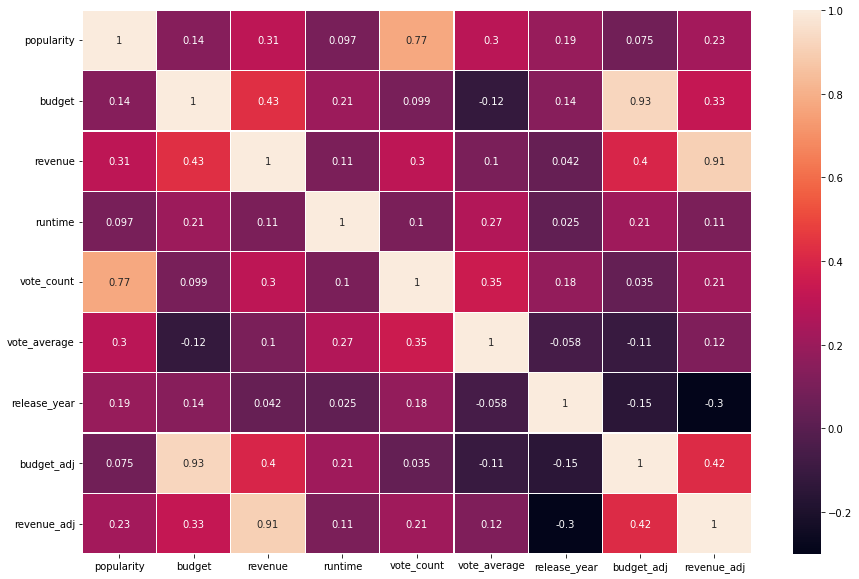

In [77]:
core = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(core,annot=True,linewidth=.2)

In [78]:
y = dataset['revenue']
x = dataset.drop(['vote_average', 'runtime', 'release_year','revenue','revenue_adj','original_title','cast','director','genres','production_companies','release_date','col_genres'],axis=1)

In [79]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 12 to 9905
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   popularity  1754 non-null   float64
 1   budget      1754 non-null   float64
 2   vote_count  1754 non-null   float64
 3   budget_adj  1754 non-null   float64
dtypes: float64(4)
memory usage: 68.5 KB


In [80]:
x.describe()

,popularity,budget,vote_count,budget_adj
count,1754.000000,1.754000e+03,1754.000000,1.754000e+03
mean,0.688731,1.480181e+07,191.802166,1.773162e+07
std,0.594990,1.127621e+07,316.416429,1.341642e+07
min,0.001117,1.000000e+00,10.000000,9.693980e-01
25%,0.333435,5.000000e+06,39.000000,6.556159e+06
50%,0.543970,1.250000e+07,88.000000,1.517253e+07
75%,0.860105,2.265000e+07,213.000000,2.675391e+07
max,7.192039,4.500000e+07,5754.000000,5.439085e+07


In [81]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3
0,0.850757,0.333333,0.495125,0.253719
1,0.494614,0.133333,0.262883,0.101488
2,0.448651,0.244444,0.129526,0.186061
3,0.428096,0.666667,0.178447,0.507438
4,0.420632,0.555556,0.210829,0.422865
...,...,...,...,...
1749,0.064034,0.011111,0.002089,0.066265
1750,0.307243,0.040000,0.138231,0.232658
1751,0.112792,0.011111,0.014276,0.064627
1752,0.092106,0.047448,0.014624,0.275979


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE is : ',mean_squared_error(y_test,prediction))
print('R squared value is : ',r2_score(y_test,prediction))

MSE is :  261763535218137.72
R squared value is :  0.16848123313430408


#**Exploratory Data Analysis**

What genre movies are more popular?

In [85]:
##split by seperator
def splitbyseperator(column,seperator):
    return column.str.split(seperator,expand=True)

In [86]:
## create a copy of genre
df_copy_genre = df1.copy()

In [87]:
## split then genre column and convert it to an array 
## eg 'Action|Thriller|Horror' = ['Action','Thriller','Horror']
df_copy_genre['genres'] = df_copy_genre.genres.str.split('|')

In [88]:
## Now we use explode function
## to give each genre its individual row
df_genre_multiple = df_copy_genre.explode('genres')
df_genre_multiple.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,col_genres
12,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108.0,Drama,DNA Films|Universal Pictures International (UP...,2015-01-21,2854.0,7.6,2015.0,1.379999e+07,3.391985e+07,"[Drama, Science Fiction]"
12,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108.0,Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854.0,7.6,2015.0,1.379999e+07,3.391985e+07,"[Drama, Science Fiction]"
30,3.927333,NaN,29355203.0,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103.0,Mystery,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425.0,6.4,2015.0,NaN,2.700677e+07,"[Mystery, Drama]"
30,3.927333,NaN,29355203.0,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103.0,Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425.0,6.4,2015.0,NaN,2.700677e+07,"[Mystery, Drama]"
35,3.557846,6000000.0,35401758.0,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117.0,Drama,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520.0,8.0,2015.0,5.519998e+06,3.256960e+07,"[Drama, Thriller]"


In [89]:
df_genre = df_genre_multiple[['popularity', 'genres','release_year']]
df_genre.head()

,popularity,genres,release_year
12,6.118847,Drama,2015.0
12,6.118847,Science Fiction,2015.0
30,3.927333,Mystery,2015.0
30,3.927333,Drama,2015.0
35,3.557846,Drama,2015.0


In [90]:
##group by genre and get popularity
df_genre_grouped = df_genre_multiple.groupby(['release_year','genres']).popularity.mean()
genre_yearwise = df_genre_grouped.to_frame().groupby(level = 'release_year').popularity.nlargest(1).to_frame()

In [91]:
genre_yearwise.reset_index(level=2,inplace=True)

In [92]:
genre_yearwise.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41 entries, (1962.0, 1962.0) to (2015.0, 2015.0)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genres      41 non-null     object 
 1   popularity  41 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.7+ KB


In [93]:
genre = genre_yearwise.genres.value_counts()
genre

Animation          9
Crime              5
History            5
War                4
Fantasy            3
Mystery            3
Science Fiction    2
Family             2
TV Movie           2
Music              2
Adventure          2
Thriller           1
Western            1
Name: genres, dtype: int64

In [94]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

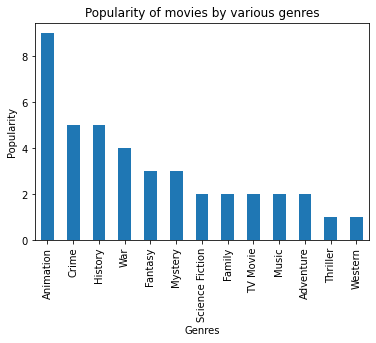

In [95]:
genre.plot.bar(title="Popularity of movies by various genres",xlabel="Genres",ylabel="Popularity");


*   Usually Adventure kind of movies are more popular followed by Animation and Fantasy
*   From 2001 to 2007 fantasy movies were most popularity consistently.
*   From 2008 to 2015 adventure movies were more popular except in 2011 and 2012



**#What genre of movies have usually been longest?**

In [96]:
runtime_genre = df_genre_multiple.groupby('genres').runtime.mean().sort_values()

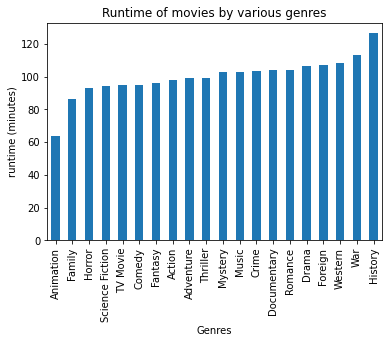

In [97]:
runtime_genre.plot.bar(title = 'Runtime of movies by various genres',xlabel='Genres',ylabel='runtime (minutes)');

# **Do More popular movies usually fall in high revenue bracket?**

In [98]:
##source of quantilecut code https://medium.com/@onpillow/02-investigate-tmdb-movie-dataset-python-data-analysis-project-part-2-exploratory-data-4839f697092
def cut_into_quantile(dfname,column_name):
    """
        cut_into_quantile takes data frame and column name as param.
        returns the dataframe with an additional column "columnname_levels" and divide it into 4 quantiles.
    """
    ## find quartile,max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
    ## bin edges that will be used to cut data in groups
    bin_edges = [min_value,first_quantile,second_quantile,third_quantile,max_value]
    ## labels for the four budget level groups
    bin_names = ['Low','Medium','Moderately High','High']
    ## Create budget levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name],bin_edges,labels=bin_names,include_lowest=True)
    return dfname

In [100]:
df_non_zero_rev = df1[df1['revenue_adj'] != 0]
df_data_revenue_bins = df_non_zero_rev[df_non_zero_rev['release_year'].isin([2010,2011,2012,2013,2014,2015])].copy()

In [101]:
df_data_revenue_quantile =  cut_into_quantile(df_data_revenue_bins,'revenue_adj')

In [102]:
revenue_frame = df_data_revenue_quantile.groupby(['release_year','revenue_adj_levels']).popularity.mean().to_frame()

In [103]:
revenue_frame.reset_index(level=0,inplace=True)

In [104]:
revenue_frame.reset_index(level=0,inplace=True)

In [105]:
low_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'Low'].popularity.tolist()
medium_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'Medium'].popularity.tolist()
mod_high_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'Moderately High'].popularity.tolist()
high_revenue_pop = revenue_frame[revenue_frame['revenue_adj_levels'] == 'High'].popularity.tolist()

In [106]:
len(high_revenue_pop)
release_years = [2010,2011,2012,2013,2014,2015]

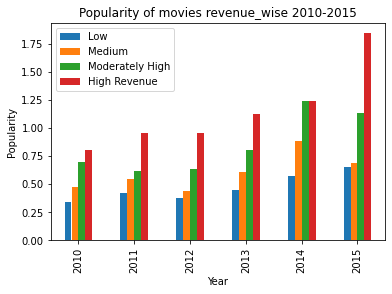

In [107]:
plotdata = pd.DataFrame({
    "Low": low_revenue_pop,
    "Medium": medium_revenue_pop,
    "Moderately High": mod_high_revenue_pop,
    "High Revenue": high_revenue_pop
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies revenue_wise 2010-2015')
plt.xlabel("Year")
plt.ylabel("Popularity");

## Observations - Relation between revenue and popularity of movies

* Seeing the trend from 2010 to 2015 ,higher revenue movies have more popularity.This can be validated by the hypothesis that more revenue implies more tickets sold implies more people have watched the movie and hence the popularity.
* Also if we see from 2013 to 2015.there is a drastic shift in popularity of high revenue movies as compared to other categories (200% approx increase).This could be due to surge in social media users number and thus more popularity.

In [108]:
release_year_latest = [2010,2011,2012,2013,2014,2015]

#Have longer movies been more popular than the shorter ones?

In [109]:
## running time bins
df_copy=df1[df1['release_year'].isin(release_year_latest)].copy()
df_copy = df_copy[df_copy['runtime'] != 900]
df_runtime_bins = cut_into_quantile(df_copy,'runtime')

In [110]:
df_copy[df_copy['runtime'] >= 400]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_levels
2170,367186,0.082894,0,0,The Pillars of the Earth,Ian McShane|Matthew Macfadyen|Eddie Redmayne|H...,Sergio Mimica-Gezzan,421.0,Drama|History|Romance,Scott Free Productions|Tandem Communications|T...,2010-07-23,22.0,7.3,2010.0,0.0,0.0,High
6008,222724,0.141918,0,0,Crystal Lake Memories: The Complete History of...,Corey Feldman,Daniel Farrands,400.0,Documentary,Hutson Ranch Media,2013-09-13,10.0,6.9,2013.0,0.0,0.0,High


In [112]:
popularitybyruntime = df_runtime_bins.groupby(['release_year','runtime_levels']).popularity.median().to_frame()
popularitybyruntime.reset_index(inplace=True)

In [113]:
popularitybyruntime


,release_year,runtime_levels,popularity
0,2010.0,Low,0.267950
1,2010.0,Medium,0.308952
2,2010.0,Moderately High,0.379104
3,2010.0,High,0.393778
4,2011.0,Low,0.306124
5,2011.0,Medium,0.331991
6,2011.0,Moderately High,0.384605
7,2011.0,High,0.410207
8,2012.0,Low,0.257370
9,2012.0,Medium,0.291139


# Do movies having higher budget more popular than movies with lower budget?

In [114]:
df_c = df1[df1['budget_adj']!=0].copy()
df_budget_group = cut_into_quantile(df_c,'budget_adj')

In [115]:
df_budget_filtered_data = df_budget_group[df_budget_group['release_year'].isin([2010,2011,2012,2013,2014,2015])]
    
df_popularity_on_budget = df_budget_filtered_data.groupby(['release_year','budget_adj_levels']).popularity.mean().to_frame().reset_index()

In [116]:
short_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Low'].popularity.tolist()
medium_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Medium'].popularity.tolist()
mod_long_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'Moderately High'].popularity.tolist()
long_movie_vote = df_popularity_on_budget[df_popularity_on_budget['budget_adj_levels'] == 'High'].popularity.tolist()

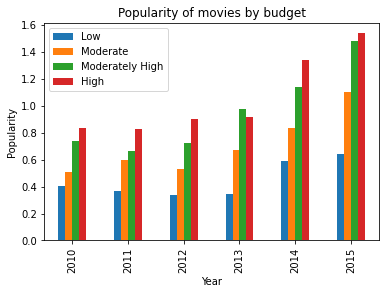

In [117]:
plotdata = pd.DataFrame({
    "Low": short_movie_vote,
    "Moderate": medium_movie_vote,
    "Moderately High": mod_long_movie_vote,
    "High": long_movie_vote
},index=release_years)

plotdata.plot(kind='bar')
plt.title('Popularity of movies by budget')
plt.xlabel("Year")
plt.ylabel("Popularity");

## Results - Budget and Popularity 

* Seeing the latest trends in above graph we could say Higher budget movies are more popular.
* Higher budget movies have higher marketing expense as compared to the lower budget movies 

# **Top 10 Movies by Average Vot**es

In [119]:
top_10_movies_by_vote = df1.sort_values(by = ['vote_average'],ascending = False)[['original_title','vote_average']].head(10)
top_10_movies_by_vote.reset_index(drop=True,inplace=True)
top_10_movies_by_vote.set_index('original_title',inplace=True)
top_10_movies_by_vote

,vote_average
original_title,
The Story of Film: An Odyssey,9.2
Black Mirror: White Christmas,8.8
Pink Floyd: Pulse,8.7
Dave Chappelle: Killin' Them Softly,8.5
Queen - Rock Montreal,8.5
A Personal Journey with Martin Scorsese Through American Movies,8.5
The Art of Flight,8.5
Stop Making Sense,8.4
The Shawshank Redemption,8.4


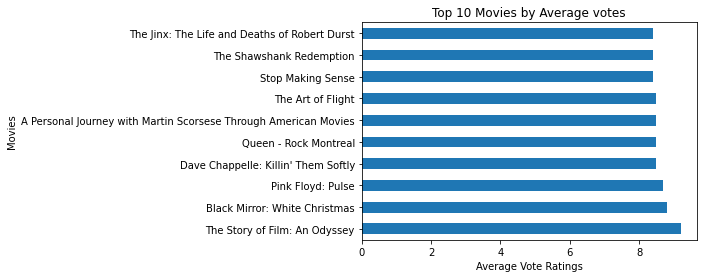

In [120]:
top_10_movies_by_vote.vote_average.plot(kind='barh')
plt.title('Top 10 Movies by Average votes')
plt.ylabel('Movies')
plt.xlabel('Average Vote Ratings');

## **Observations**

* Above are the top 10 movies byvote ratings.
* The Story of Film: An Odyssey,The Mask You Live In are the top 2 movies by ratings. 

# **Top 10 Movies by popularity**

In [122]:
top_movie_by_pop = df1.sort_values(by = ['popularity'],ascending = False)[['original_title','popularity']].head(10)
top_movie_by_pop.reset_index(drop=True,inplace=True)
top_movie_by_pop.set_index('original_title',inplace=True)
top_movie_by_pop

,popularity
original_title,
Underworld: Endless War,8.411577
The Shawshank Redemption,7.192039
Eddie Izzard: Glorious,6.668990
Ex Machina,6.118847
Nightcrawler,5.522641
Whiplash,4.780419
Reservoir Dogs,4.586426
Mulholland Drive,4.436367
The Interview,3.989231


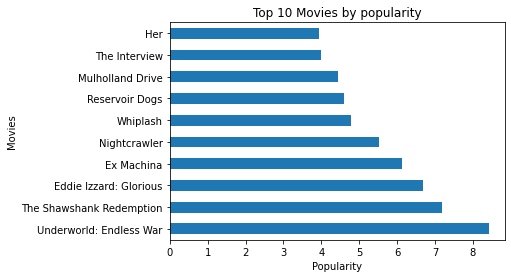

In [123]:
top_movie_by_pop.popularity.plot(kind='barh')
plt.title('Top 10 Movies by popularity')
plt.ylabel('Movies')
plt.xlabel('Popularity');

# **Month and number of movies released in that  month**

In [129]:
df['Month'] = df['release_date'].dt.month

In [130]:
no_of_movies_by_month = df.groupby('Month').id.count()
labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

no_of_movies_by_month

Month
1      750
2      508
3      581
4      616
5      589
6      497
7      529
8      675
9     1099
10     869
11     533
12     568
Name: id, dtype: int64

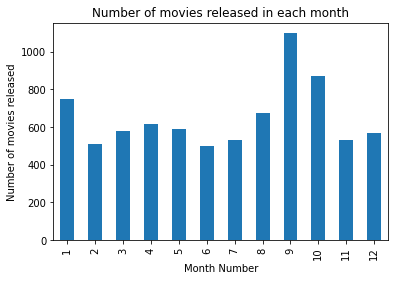

In [131]:
no_of_movies_by_month.plot(kind='bar',title="Number of movies released in each month",xlabel="Month Number",ylabel="Number of movies released",x=labels);

In [132]:
df_year_month_group = df.groupby(['release_year','Month']).id.count()

In [133]:
df_year_month_group.to_frame().reset_index(drop=True,inplace=True)

In [134]:
df_year_month_group.groupby(level = 'release_year').nlargest(1).to_frame()

,,,id
release_year,release_year,Month,
1962.0,1962.0,6,8
1964.0,1964.0,10,7
1968.0,1968.0,7,5
1972.0,1972.0,3,5
1974.0,1974.0,10,8
1975.0,1975.0,6,5
1977.0,1977.0,3,5
1979.0,1979.0,7,5
1980.0,1980.0,9,11


### **Observations**

* Most number of movies were released in the 9th month of year(Septmeber) followed by October.
* December and January were the next favourite months for release of the movies.

#Modeling **

In [137]:
dataset.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,col_genres
12,6.118847,15000000.0,36869414.0,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108.0,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2015-01-21,2854.0,7.6,2015.0,1.379999e+07,3.391985e+07,"[Drama, Science Fiction]"
35,3.557846,6000000.0,35401758.0,Room,Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...,Lenny Abrahamson,117.0,Drama|Thriller,Element Pictures|No Trace Camping|A24|Duperele...,2015-10-16,1520.0,8.0,2015.0,5.519998e+06,3.256960e+07,"[Drama, Thriller]"
39,3.227329,11000000.0,62076141.0,Brooklyn,Saoirse Ronan|Domhnall Gleeson|Emory Cohen|Emi...,John Crowley,111.0,Drama|Romance,Wildgaze Films|Irish Film Board|Item 7|Paralle...,2015-11-04,754.0,7.3,2015.0,1.012000e+07,5.711002e+07,"[Drama, Romance]"
42,3.079522,30000000.0,34441873.0,Steve Jobs,Michael Fassbender|Kate Winslet|Seth Rogen|Kat...,Danny Boyle,122.0,History|Drama,Universal Pictures|Scott Rudin Productions|Leg...,2015-10-09,1035.0,6.9,2015.0,2.759999e+07,3.168651e+07,"[History, Drama]"
44,3.025852,25000000.0,42629776.0,The Age of Adaline,Blake Lively|Michiel Huisman|Harrison Ford|Ell...,Lee Toland Krieger,112.0,Fantasy|Drama|Romance,Lakeshore Entertainment|Sidney Kimmel Entertai...,2015-04-16,1221.0,7.3,2015.0,2.299999e+07,3.921938e+07,"[Fantasy, Drama, Romance]"


In [138]:
dataset.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'col_genres'],
      dtype='object')

In [139]:
dataset.shape

(1754, 16)

In [140]:
y = dataset['revenue']
x = dataset.drop(['vote_average', 'runtime', 'release_year','revenue','revenue_adj','original_title','cast','director','genres','production_companies','release_date','col_genres'],axis=1)

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .25)

In [142]:
#Model 1 :Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [143]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [144]:
print("Accuracy:",accuracy_score(y_test,y_pred) )
print("Precision_score :",precision_score(y_test,y_pred,pos_label='positive',average='micro') )
print("Recall_score:",recall_score(y_test,y_pred,pos_label='positive',average='micro') )
print("f1_score is:",f1_score(y_test,y_pred,pos_label='positive',average='micro') )

Accuracy: 0.0
Precision_score : 0.0
Recall_score: 0.0
f1_score is: 0.0


In [145]:
y_test.value_counts()

1000000.0     2
11000000.0    2
24922237.0    2
21000000.0    2
6676471.0     1
             ..
38610009.0    1
30987695.0    1
39300000.0    1
27645491.0    1
100.0         1
Name: revenue, Length: 435, dtype: int64

In [146]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [147]:
#model 2: KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
y_pred = knnmodel.predict(x_test)

In [148]:
print("Accuracy is:",knnmodel.score(x_test,y_pred))
print("f1_score is:",f1_score(y_test,y_pred,pos_label='positive',average='micro') )

Accuracy is: 1.0
f1_score is: 0.0


In [149]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#**fine-tuning **

In [150]:
from sklearn.model_selection import cross_val_score
all_model = [LogisticRegression(), KNeighborsClassifier()]

In [156]:
recall = []
accuracy = []

for model in all_model:
    cv = cross_val_score(model, x_train, y_train, scoring='recall', cv=2).mean()
    recall.append(cv)

    cv = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=2).mean()
    accuracy.append(cv)

In [157]:
model = ['LogisticRegression', 'KNeighborsClassifier']

score = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'Recall': recall})
score.style.background_gradient(high=1,axis=0)

,Model,Accuracy,Recall
0,LogisticRegression,0.000000,nan
1,KNeighborsClassifier,0.000000,nan
